In [31]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

In [32]:
transaction_df=pd.read_csv('KPMGData.csv')

In [33]:
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24/06/2017,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",37823.0
19996,19997,41,127,09/11/2017,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",35560.0
19997,19998,87,2284,14/04/2017,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",40410.0
19998,19999,6,2764,03/07/2017,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",38216.0


<AxesSubplot:>

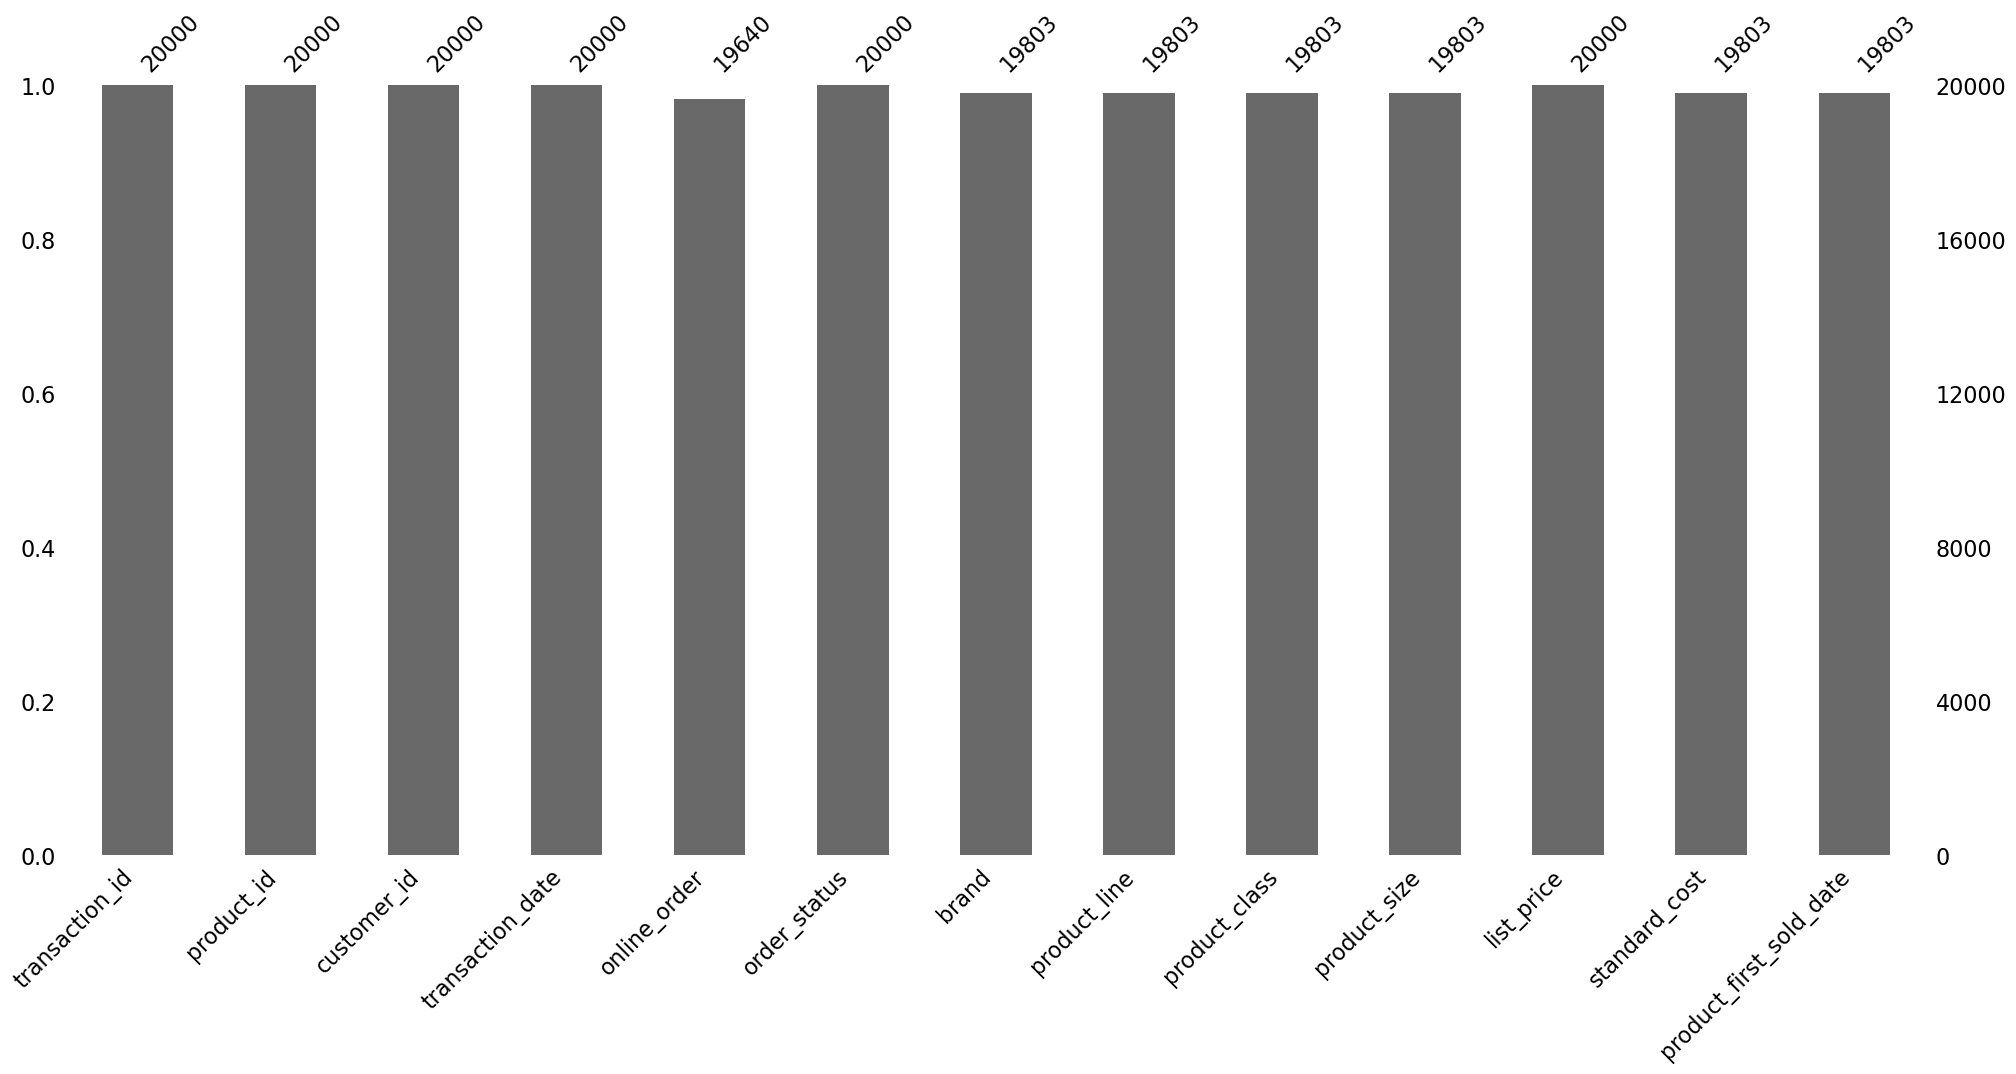

In [34]:
#check for misisng values
msno.bar(transaction_df)

#Fill missing values with mean(numeric columns)

In [35]:
print(transaction_df.isnull().values.sum())
#replace missing values with NaNs
transaction_df=transaction_df.replace("",np.NaN)
#fill missing values with mean(numeric columns)
transaction_df=transaction_df.fillna(transaction_df.mean())
#count the NaNs value after filling with mean
print(transaction_df.isnull().values.sum())

1542
985


C:\Users\admin\AppData\Local\Temp\ipykernel_5032\385351291.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transaction_df=transaction_df.fillna(transaction_df.mean())


#Impute missing values in categorical columns (object types)

In [36]:
#Impute missing values in categorical columns (object types)
#check the dataset info
print(transaction_df.info())
for i in transaction_df.columns:
    #check if the column is object dtype
    if transaction_df[i].dtypes=='object':
        #impute object column with most frequent value
        transaction_df[i]=transaction_df[i].fillna(transaction_df[i].value_counts().index[0])

#print the number of total missing values to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB
None
0


Make filter order_status = 'Approved'

In [37]:
#make filter order_status = 'Approved'
transaction_df=transaction_df[transaction_df['order_status']=='Approved']

In [38]:
#check for 
duplicateRows = transaction_df[transaction_df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, list_price, standard_cost, product_first_sold_date]
Index: []


In [39]:
#create a function, parse the date time a customer made a transaction based on the time cohort: day 1 every month
def get_month(x):
    return dt.datetime(x.year,x.month,1)

#apply get_month function on date columns of data transaction_df. store in TransactionMonth
transaction_df['transaction_date']=pd.to_datetime(transaction_df['transaction_date'])
transaction_df['transaction_date'] = transaction_df['transaction_date'].astype('datetime64[ns]')
transaction_df['TransMonth']=transaction_df['transaction_date'].apply(get_month)

#get the first time a customer making a purchase (get minimum transmonth)
transaction_df['CohortMonth'] = transaction_df.groupby('customer_id')['TransMonth'].transform('min')

transaction_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_5032\2484452357.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  transaction_df['transaction_date']=pd.to_datetime(transaction_df['transaction_date'])


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransMonth,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0,2017-01-01,2017-01-01


Calculating time offset in Month as Cohort Index

In [40]:
def return_cohortindex(df):
    def get_date_int(df, column):
        year = df[column].dt.year
        month = df[column].dt.month
        day = df[column].dt.day
        return year, month, day

    # Getting the integers for date parts from the `InvoiceDay` column
    transaction_year, transaction_month, _ = get_date_int(df, 'TransMonth')

    # Getting the integers for date parts from the `CohortDay` column
    cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

    years_diff=transaction_year-cohort_year
    months_diff=transaction_month-cohort_month

    df['CohortIndex']=years_diff*12+months_diff+1

    return df

transaction_df=return_cohortindex(transaction_df)



In [41]:
#Group cohortmonth and cohortindex to count the distinct users  
grouping=transaction_df.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()

#create pivot cohort data
cohort_counts=grouping.pivot(index='CohortMonth',columns='CohortIndex',values='customer_id')
cohort_counts


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1343.0,489.0,484.0,478.0,481.0,480.0,526.0,507.0,478.0,511.0,504.0,498.0
2017-02-01,802.0,322.0,305.0,328.0,299.0,296.0,322.0,304.0,330.0,308.0,280.0,NaN
2017-03-01,502.0,190.0,182.0,190.0,188.0,217.0,196.0,188.0,191.0,204.0,NaN,NaN
2017-04-01,308.0,102.0,110.0,128.0,120.0,97.0,131.0,130.0,130.0,NaN,NaN,NaN
2017-05-01,215.0,84.0,89.0,86.0,80.0,90.0,66.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,118.0,37.0,48.0,50.0,40.0,48.0,46.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,80.0,42.0,21.0,30.0,35.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,54.0,19.0,20.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,34.0,12.0,9.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate metric: Retention Rate

The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In [42]:
#select the first column of pivot table as the number of customers activein the first month order. 
#Store the first columns as cohort size

cohort_sizes=cohort_counts.iloc[:,0]

#devide the cohorts_counts with cohort_size to calculate retention rate
retention=cohort_counts.divide(cohort_sizes,axis=0)

retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,36.4,36.0,35.6,35.8,35.7,39.2,37.8,35.6,38.0,37.5,37.1
2017-02-01,100.0,40.1,38.0,40.9,37.3,36.9,40.1,37.9,41.1,38.4,34.9,NaN
2017-03-01,100.0,37.8,36.3,37.8,37.5,43.2,39.0,37.5,38.0,40.6,NaN,NaN
2017-04-01,100.0,33.1,35.7,41.6,39.0,31.5,42.5,42.2,42.2,NaN,NaN,NaN
2017-05-01,100.0,39.1,41.4,40.0,37.2,41.9,30.7,37.7,NaN,NaN,NaN,NaN
2017-06-01,100.0,31.4,40.7,42.4,33.9,40.7,39.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,52.5,26.2,37.5,43.8,32.5,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,35.2,37.0,40.7,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,35.3,26.5,47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<li> Index value represents the Cohort </li>
<li>Columns represent the number of months since current Cohort</li>
<br> 
<li>Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customers signed up in 1st Month</li>
<li>Retention Rate may increase or decrease in Subsequent Indexes.</li>
<li>Values towards BottomRight have a lot of NaN values.</li>

Visualizing the retention rate

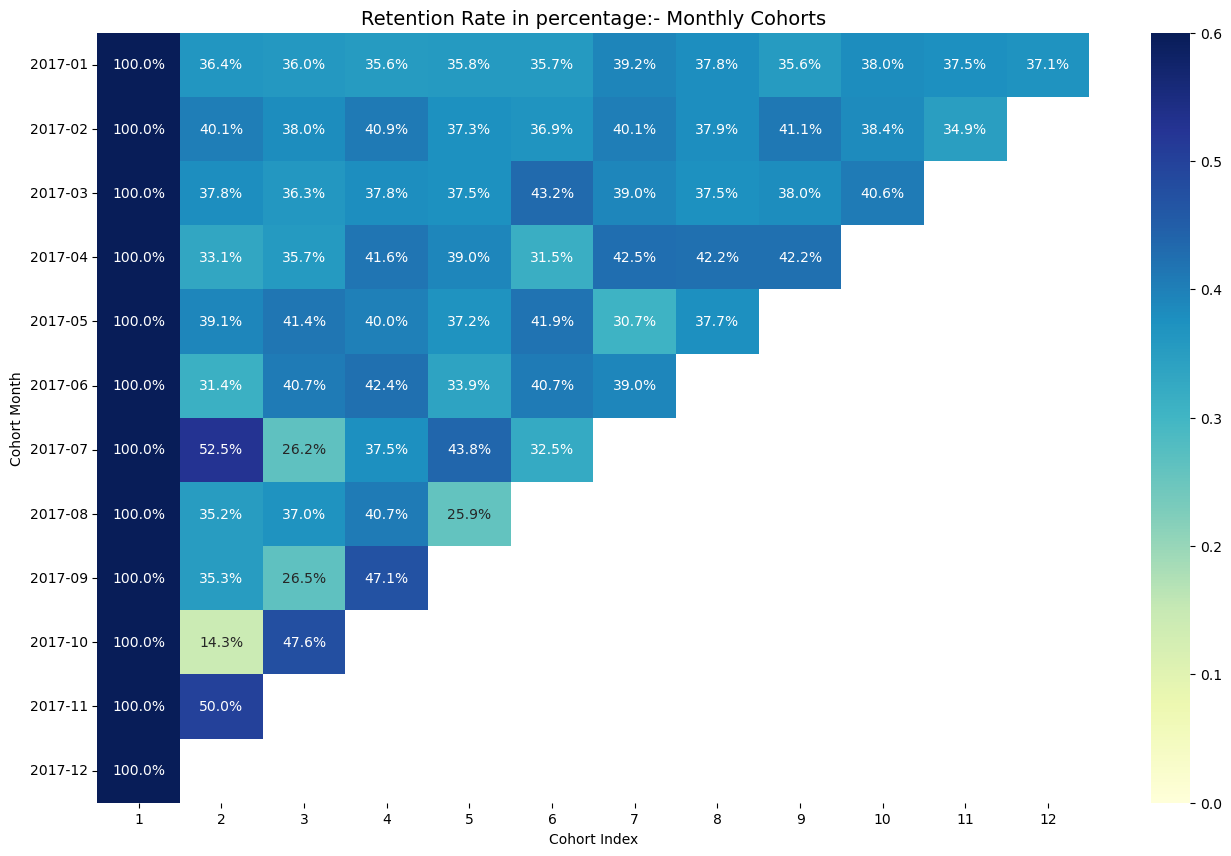

In [43]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.1%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

Insights

<li>The retention rate of KPMG transaction data falls within the range of 14.3% to 52.5%. This is a relatively low average retention rate.</li>
<li>Customers who started using the service from January 2017 had the most consistent retention rate across months, ranging from 35.6% to 39.2%.</li>
<li>Customers who started using the service from April experienced peak retention rates in the last three months of the year, reaching 42.5%, 42.2%, and 42.2% respectively.</li>
<li>In the last quarter, typically, the months tend to have the lowest retention rates from previous months. For instance, in June (with retention rates from January at 35.7% and from April also at 35.7%), September (with retention rates from July at 26.2%, from April at 31.5%, and from January at 35.6%), and December (with retention rates from August at 25.9%, from July at 32.5%, and from February at 34.9%).</li>
<li>During the beginning and middle months of the quarter, the retention rates of customers tend to be higher. In July, the retention rates from previous months range from 31.4% to 39.2%. In August, the range is from 37.8% to 52.5%. For October, it ranges from 33.9% to 42.5%, and for November, it ranges from 14.3% to 43.8%.</li>

